In [8]:
import pandas as pd
from prophet import Prophet

class ModelPipeline:
    def __init__(self, path, date_col, target_col, periods):
        self.model_path = path
        self.date_col = date_col
        self.target_col = target_col
        self.df = None
        self.periods = periods    
        self.prop_df = None
        self.proph = Prophet()
        self.future = None
        self.forecast = None

    def getData(self):
        self.df = pd.read_csv(self.model_path)
        self.prop_df = self.df[[self.date_col, self.target_col]].copy()
        self.prop_df.rename(
            columns={
                self.date_col: 'ds',
                self.target_col: 'y'
            }, inplace=True
        )
        self.prop_df['ds'] = pd.to_datetime(self.prop_df['ds'])
        self.prop_df['ds'] = self.prop_df['ds'].dt.normalize()

    def propSetup(self):
        self.proph.fit(self.prop_df)
        self.future = self.proph.make_future_dataframe(periods=self.periods)
        self.forecast = self.proph.predict(self.future)
        
    def prophPipeline(self):
        self.getData()
        self.propSetup()
        return self.forecast

    def get_future_predictions(self):
        """
        Extracts only the future predicted values ('yhat') into a list.
        
        Returns:
            list: A list of predicted values for the future periods.
        """
        if self.forecast is None:
            print("Pipeline has not been run. Please call prophPipeline() first.")
            return []
            
        
        future_forecasts = self.forecast.tail(self.periods)
        
        
        prediction_values = future_forecasts['yhat']
        
        return prediction_values.tolist()

    def plot_forecast(self):
        """Uses Prophet's built-in plotting to visualize the forecast."""
        if self.forecast is not None:
            fig = self.proph.plot(self.forecast)
            fig.show()
        else:
            print("You must run the pipeline first to generate a forecast to plot.")

In [15]:
num = 10
m = ModelPipeline("./datasets/retail_sales_dataset.csv", "Date", "Total Amount", num)

m.prophPipeline()

future_predictions_array = m.get_future_predictions()

print("\n--- Array of Future Predictions ---")
print(future_predictions_array)


print(f"Number of predictions: {len(future_predictions_array)}")

16:13:28 - cmdstanpy - INFO - Chain [1] start processing
16:13:29 - cmdstanpy - INFO - Chain [1] done processing



--- Array of Future Predictions ---
[434.21807313781164, 425.8900769749982, 440.5801716993869, 466.77379225076226, 528.6753978996669, 427.9914817581408, 484.53691398198566, 434.3731389452241, 426.0451427820706, 440.7352375066273]
Number of predictions: 10


In [27]:
import matplotlib.pyplot as plt

df = pd.read_csv("./datasets/retail_sales_dataset.csv")


In [45]:
df.head()
df = df.sort_values(by="Date", ascending=True)

In [46]:
df['Date'] = pd.to_datetime(df['Date'])

In [47]:
df = df[-num*10:] 

In [48]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
981,982,2023-12-19,CUST982,Female,46,Beauty,3,30,90
915,916,2023-12-24,CUST916,Female,32,Electronics,1,50,50
990,991,2023-12-26,CUST991,Female,34,Clothing,2,50,100
988,989,2023-12-28,CUST989,Female,44,Electronics,1,25,25
907,908,2023-12-29,CUST908,Male,46,Beauty,4,300,1200


In [49]:
df.iloc()[-1]['Date'].date()

datetime.date(2023, 12, 29)

In [50]:
import pandas as pd

def generate_date_series(start_date, num_days):
    dates = pd.date_range(start=start_date, periods=num_days, freq="D")
    return pd.Series(dates)


date_series = generate_date_series(df.iloc()[-1]['Date'].date(), 10)
print(date_series)


0   2023-12-29
1   2023-12-30
2   2023-12-31
3   2024-01-01
4   2024-01-02
5   2024-01-03
6   2024-01-04
7   2024-01-05
8   2024-01-06
9   2024-01-07
dtype: datetime64[ns]


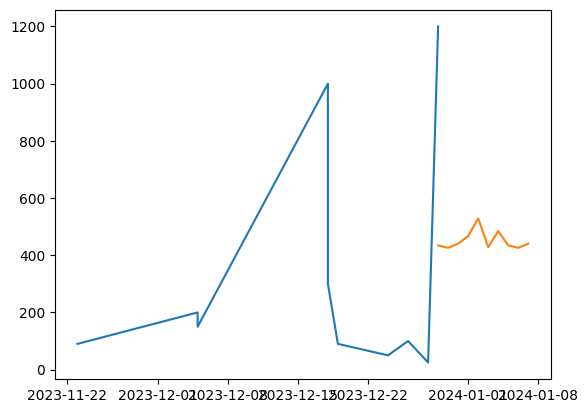

In [ ]:
plt.plot(df['Date'][-num:], df['Total Amount'][-num:])
plt.plot(date_series, future_predictions_array)

In [58]:
num = 200
m = ModelPipeline("./datasets/train/t1.csv", "Date", "Total Amount", num)

m.prophPipeline()

future_predictions_array = m.get_future_predictions()

print("\n--- Array of Future Predictions ---")
print(future_predictions_array)


print(f"Number of predictions: {len(future_predictions_array)}")

16:43:15 - cmdstanpy - INFO - Chain [1] start processing
16:43:15 - cmdstanpy - INFO - Chain [1] done processing



--- Array of Future Predictions ---
[466.59366403887606, 443.11713147451866, 491.05428256428036, 500.7702369476149, 525.2434415429644, 457.53041750934347, 496.34645382062735, 466.75743758697854, 443.2809050224197, 491.21805611231485, 500.93401049576795, 525.4072150911765, 457.6941910573751, 496.5102273686941, 466.9212111350811, 443.4446785706247, 491.381829660471, 501.09778404392114, 525.5709886392386, 457.8579646055423, 496.67400091676086, 467.0849846830315, 443.60845211868747, 491.5456032085055, 501.2615575920067, 525.7347621873007, 458.02173815357395, 496.8377744647993, 467.24875823098193, 443.7722256667405, 491.7093767566897, 501.4253311400923, 525.898535735363, 458.1855117017031, 497.00154801298805, 467.4125317790845, 443.93599921479347, 491.8731503047242, 501.58910468811416, 526.0623092834253, 458.3492852498025, 497.16532156093285, 467.57630532718696, 444.0997727629985, 492.03692385288053, 501.75287823626724, 526.2260828314874, 458.5130587979019, 497.32909510912157, 467.74007887

In [68]:
import matplotlib.pyplot as plt

df = pd.read_csv("./datasets/train/t1.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by="Date", ascending=True)

import pandas as pd

def generate_date_series(start_date, num_days):
    dates = pd.date_range(start=start_date, periods=num_days, freq="D")
    return pd.Series(dates)


date_series = generate_date_series(df.iloc()[-1]['Date'].date(), 200)


In [69]:
testdf = pd.read_csv("./datasets/test/t1.csv")

testdf['Date'] = pd.to_datetime(testdf['Date']).dt.date
testdf = testdf.sort_values(by="Date", ascending=True)

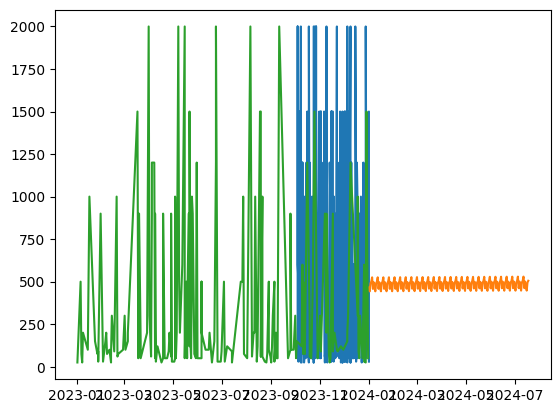

In [70]:
plt.plot(df['Date'][-num:], df['Total Amount'][-num:])
plt.plot(date_series, future_predictions_array)
plt.plot(testdf['Date'], testdf['Total Amount'])

16:53:10 - cmdstanpy - INFO - Chain [1] start processing
16:53:10 - cmdstanpy - INFO - Chain [1] done processing



--- Array of Future Predictions ---
[466.59366403887606, 443.11713147451866, 491.05428256428036, 500.7702369476149, 525.2434415429644, 457.53041750934347, 496.34645382062735, 466.75743758697854, 443.2809050224197, 491.21805611231485, 500.93401049576795, 525.4072150911765, 457.6941910573751, 496.5102273686941, 466.9212111350811, 443.4446785706247, 491.381829660471, 501.09778404392114, 525.5709886392386, 457.8579646055423, 496.67400091676086, 467.0849846830315, 443.60845211868747, 491.5456032085055, 501.2615575920067, 525.7347621873007, 458.02173815357395, 496.8377744647993, 467.24875823098193, 443.7722256667405, 491.7093767566897, 501.4253311400923, 525.898535735363, 458.1855117017031, 497.00154801298805, 467.4125317790845, 443.93599921479347, 491.8731503047242, 501.58910468811416, 526.0623092834253, 458.3492852498025, 497.16532156093285, 467.57630532718696, 444.0997727629985, 492.03692385288053, 501.75287823626724, 526.2260828314874, 458.5130587979019, 497.32909510912157, 467.74007887

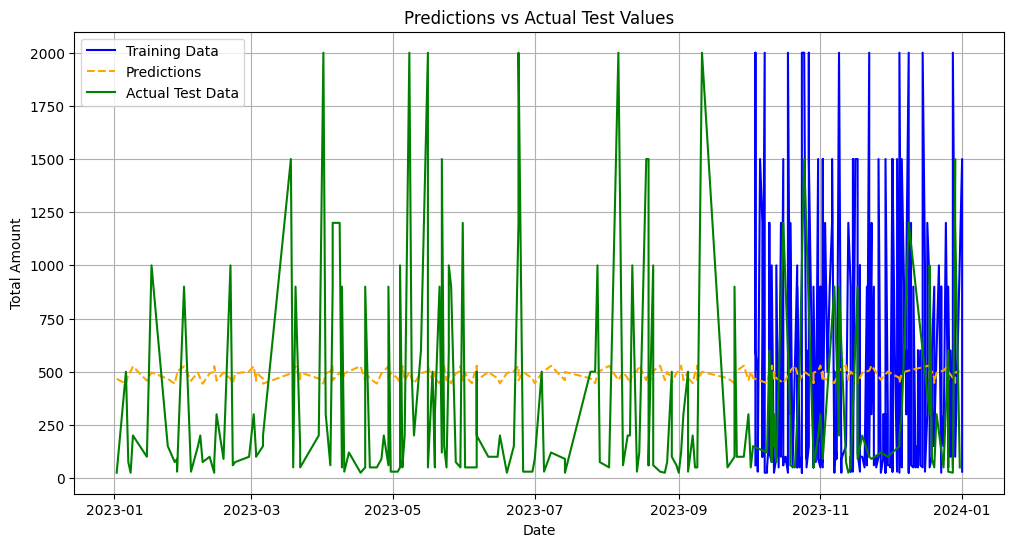

In [73]:

num = 200
train_path = "./datasets/train/t1.csv"
test_path = "./datasets/test/t1.csv"

# ------------------------------
# LOAD TRAINING DATA
# ------------------------------
df = pd.read_csv(train_path)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by="Date", ascending=True)

# ------------------------------
# CREATE MODEL AND PREDICT
# ------------------------------
m = ModelPipeline(train_path, "Date", "Total Amount", num)
m.prophPipeline()
future_predictions_array = m.get_future_predictions()

print("\n--- Array of Future Predictions ---")
print(future_predictions_array)
print(f"Number of predictions: {len(future_predictions_array)}")

# ------------------------------
# LOAD TEST DATA
# ------------------------------
testdf = pd.read_csv(test_path)
testdf['Date'] = pd.to_datetime(testdf['Date'])
testdf = testdf.sort_values(by="Date", ascending=True)

# ------------------------------
# CHECK LENGTHS
# ------------------------------
print(f"Test length: {len(testdf)}")
print(f"Prediction length: {len(future_predictions_array)}")

# If lengths mismatch, trim predictions to match test set length
if len(future_predictions_array) > len(testdf):
    future_predictions_array = future_predictions_array[:len(testdf)]
elif len(future_predictions_array) < len(testdf):
    testdf = testdf.iloc[:len(future_predictions_array)]

# ------------------------------
# PLOT RESULTS
# ------------------------------
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(df['Date'][-num:], df['Total Amount'][-num:], label="Training Data", color="blue")

# Plot predictions for test set
plt.plot(testdf['Date'], future_predictions_array, label="Predictions", color="orange", linestyle="--")

# Plot actual test set values
plt.plot(testdf['Date'], testdf['Total Amount'], label="Actual Test Data", color="green")

plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.title("Predictions vs Actual Test Values")
plt.legend()
plt.grid(True)
plt.show()


16:54:21 - cmdstanpy - INFO - Chain [1] start processing
16:54:22 - cmdstanpy - INFO - Chain [1] done processing



--- Array of Future Predictions ---
[466.59366403887606, 443.11713147451866, 491.05428256428036, 500.7702369476149, 525.2434415429644, 457.53041750934347, 496.34645382062735, 466.75743758697854, 443.2809050224197, 491.21805611231485, 500.93401049576795, 525.4072150911765, 457.6941910573751, 496.5102273686941, 466.9212111350811, 443.4446785706247, 491.381829660471, 501.09778404392114, 525.5709886392386, 457.8579646055423, 496.67400091676086, 467.0849846830315, 443.60845211868747, 491.5456032085055, 501.2615575920067, 525.7347621873007, 458.02173815357395, 496.8377744647993, 467.24875823098193, 443.7722256667405, 491.7093767566897, 501.4253311400923, 525.898535735363, 458.1855117017031, 497.00154801298805, 467.4125317790845, 443.93599921479347, 491.8731503047242, 501.58910468811416, 526.0623092834253, 458.3492852498025, 497.16532156093285, 467.57630532718696, 444.0997727629985, 492.03692385288053, 501.75287823626724, 526.2260828314874, 458.5130587979019, 497.32909510912157, 467.74007887

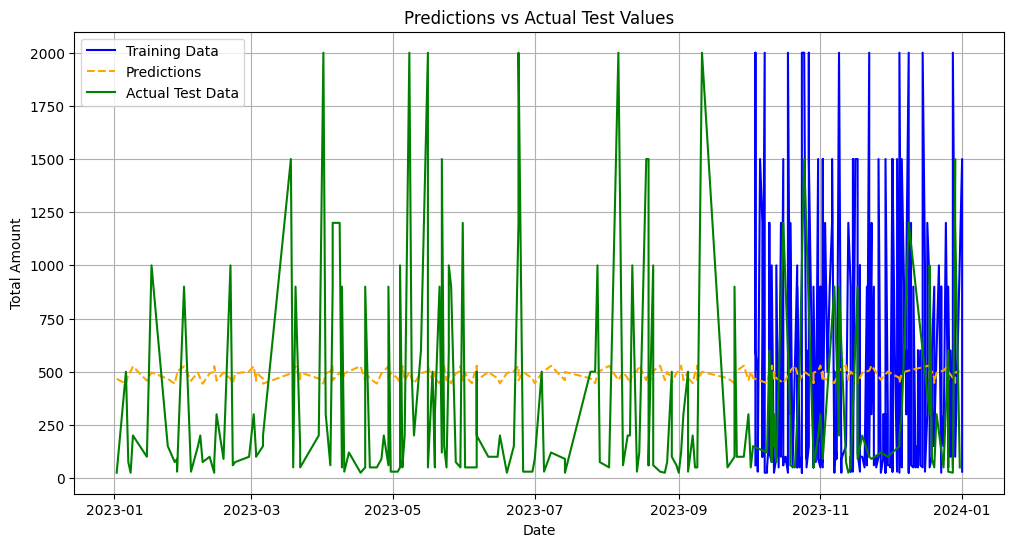

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# ========================
# MODEL PIPELINE CLASS
# ========================
class ModelPipeline:
    def __init__(self, path, date_col, target_col, periods):
        self.model_path = path
        self.date_col = date_col
        self.target_col = target_col
        self.df = None
        self.periods = periods    
        self.prop_df = None
        self.proph = Prophet()
        self.future = None
        self.forecast = None

    def getData(self):
        self.df = pd.read_csv(self.model_path)
        self.prop_df = self.df[[self.date_col, self.target_col]].copy()
        self.prop_df.rename(
            columns={
                self.date_col: 'ds',
                self.target_col: 'y'
            }, inplace=True
        )
        self.prop_df['ds'] = pd.to_datetime(self.prop_df['ds'])
        self.prop_df['ds'] = self.prop_df['ds'].dt.normalize()

    def propSetup(self):
        self.proph.fit(self.prop_df)
        self.future = self.proph.make_future_dataframe(periods=self.periods)
        self.forecast = self.proph.predict(self.future)
        
    def prophPipeline(self):
        self.getData()
        self.propSetup()
        return self.forecast

    def get_future_predictions(self):
        if self.forecast is None:
            print("Pipeline has not been run. Please call prophPipeline() first.")
            return []
            
        future_forecasts = self.forecast.tail(self.periods)
        prediction_values = future_forecasts['yhat']
        return prediction_values.tolist()

    def plot_forecast(self):
        if self.forecast is not None:
            fig = self.proph.plot(self.forecast)
            fig.show()
        else:
            print("You must run the pipeline first to generate a forecast to plot.")


# ========================
# MAIN SCRIPT
# ========================

# PARAMETERS
num = 200
train_path = "./datasets/train/t1.csv"
test_path = "./datasets/test/t1.csv"

# ------------------------------
# LOAD TRAINING DATA
# ------------------------------
df = pd.read_csv(train_path)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by="Date", ascending=True)

# ------------------------------
# CREATE MODEL AND PREDICT
# ------------------------------
m = ModelPipeline(train_path, "Date", "Total Amount", num)
m.prophPipeline()
future_predictions_array = m.get_future_predictions()

print("\n--- Array of Future Predictions ---")
print(future_predictions_array)
print(f"Number of predictions: {len(future_predictions_array)}")

# ------------------------------
# LOAD TEST DATA
# ------------------------------
testdf = pd.read_csv(test_path)
testdf['Date'] = pd.to_datetime(testdf['Date'])
testdf = testdf.sort_values(by="Date", ascending=True)

# ------------------------------
# ALIGN LENGTHS
# ------------------------------
if len(future_predictions_array) > len(testdf):
    future_predictions_array = future_predictions_array[:len(testdf)]
elif len(future_predictions_array) < len(testdf):
    testdf = testdf.iloc[:len(future_predictions_array)]

# ------------------------------
# PLOT RESULTS
# ------------------------------
plt.figure(figsize=(12, 6))

plt.plot(df['Date'][-num:], df['Total Amount'][-num:], label="Training Data", color="blue")
plt.plot(testdf['Date'], future_predictions_array, label="Predictions", color="orange", linestyle="--")
plt.plot(testdf['Date'], testdf['Total Amount'], label="Actual Test Data", color="green")

plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.title("Predictions vs Actual Test Values")
plt.legend()
plt.grid(True)
plt.show()


In [77]:
newdf = pd.read_csv("datasets/retail_sales_dataset.csv")
newdf['Date'] = pd.to_datetime(newdf['Date'])
newdf = newdf.sort_values(by="Date", ascending=True)
newdf.rename(
    columns={
        "Date":'ds',
        "Total Amount": 'y'
    },inplace=True
)
mm = Prophet()
mm.fit(newdf)

16:58:03 - cmdstanpy - INFO - Chain [1] start processing
16:58:03 - cmdstanpy - INFO - Chain [1] done processing


In [87]:
future = mm.make_future_dataframe(periods=10)
future.tail()

,ds
350,2024-01-07
351,2024-01-08
352,2024-01-09
353,2024-01-10
354,2024-01-11


In [88]:
# Python
forecast = mm.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
350,2024-01-07,420.117435,-304.493053,1175.737030
351,2024-01-08,476.660211,-250.811141,1170.869213
352,2024-01-09,426.972324,-323.339961,1112.579534
353,2024-01-10,418.565253,-280.425597,1149.619424
354,2024-01-11,434.083001,-279.990166,1159.341784


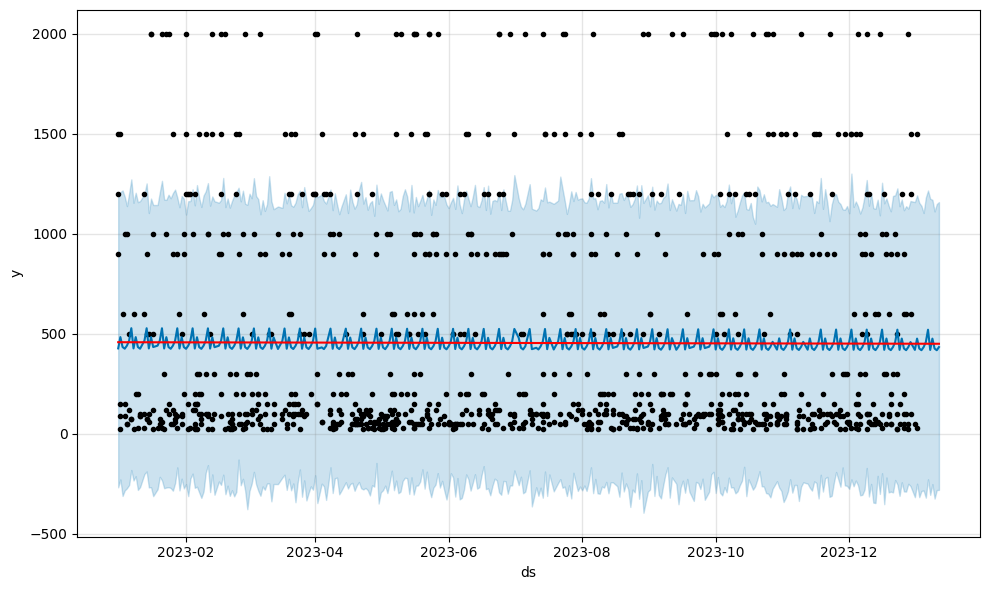

In [89]:
fig1 = mm.plot(forecast)
plt.plot(forecast['ds'], forecast['trend'], color='red')


In [100]:
x1_min, x1_max = forecast['yhat_lower'].mean(), forecast['yhat_upper'].mean()
x1_max, x1_min

(np.float64(1170.1293770974398), np.float64(-262.1417264033836))

In [97]:
x2_min, x2_max = forecast['yhat'].max(), forecast['yhat'].min()

In [101]:
def map_value(value, x1_min, x1_max, x2_min, x2_max):
    if x1_max == x1_min:
        raise ValueError("Source range min and max cannot be equal.")
    return x2_min + ((value - x1_min) / (x1_max - x1_min)) * (x2_max - x2_min)

sensitive_vals = []
for i in forecast['yhat']:
    mpvalue = map_value(i, x2_min, x2_max, x1_min, x1_max)
    sensitive_vals.append(mpvalue)

In [102]:
sensitive_vals

[np.float64(1050.0103264181694),
 np.float64(314.3693909239663),
 np.float64(960.8260548202285),
 np.float64(1070.2050572991907),
 np.float64(868.3139058718513),
 np.float64(542.9085405278975),
 np.float64(-262.1417264033836),
 np.float64(1051.8962789807251),
 np.float64(316.2553434863396),
 np.float64(962.7120073793379),
 np.float64(1072.0910098640488),
 np.float64(544.7944930877768),
 np.float64(-260.255773840131),
 np.float64(1053.78223033011),
 np.float64(318.1412936217723),
 np.float64(964.5979563049049),
 np.float64(872.0858049291716),
 np.float64(546.6804383724307),
 np.float64(-258.36982976959763),
 np.float64(1055.6681744019725),
 np.float64(320.0272376952868),
 np.float64(966.4839003787914),
 np.float64(1075.8629016448963),
 np.float64(873.9717489996893),
 np.float64(548.5663824443203),
 np.float64(-256.4838859810527),
 np.float64(1057.5541179083266),
 np.float64(321.91318091736696),
 np.float64(968.3698433190519),
 np.float64(1077.7488443024272),
 np.float64(875.857691373685

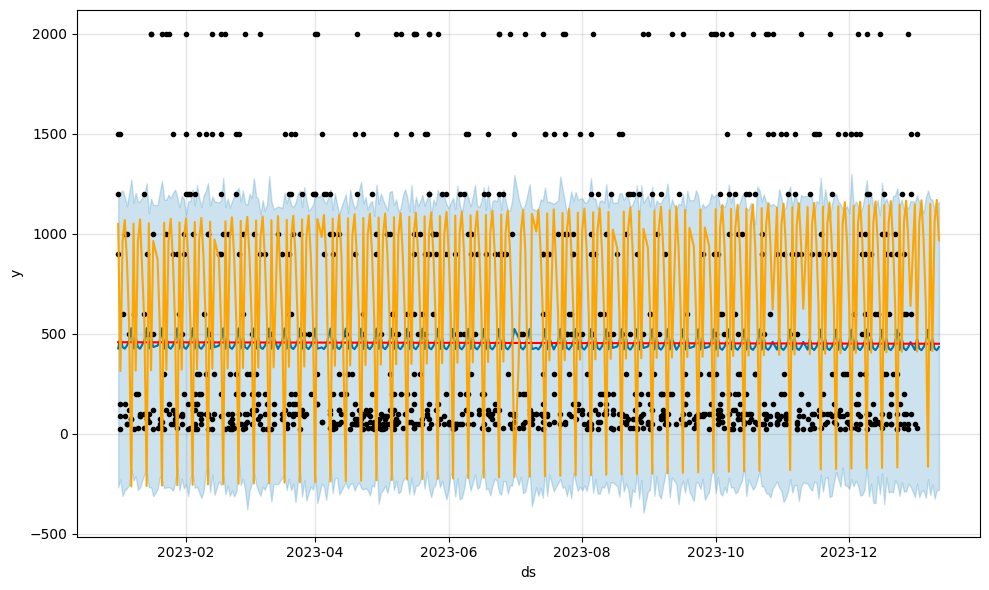

In [104]:
fig1 = mm.plot(forecast)
plt.plot(forecast['ds'], forecast['trend'], color='red')
plt.plot(forecast['ds'], sensitive_vals, color='orange')